<a href="https://colab.research.google.com/github/Zeke-Woods/Stats360Code/blob/main/HomeWork_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
Haystacks <- read.csv("Haystacks.csv") 
ls(Haystacks)
#head (Haystacks)

[1] "Circumference..ft." "Over..ft."          "RowID"             
[4] "Volume"

In [ ]:
(Haystacks %>%
  summarise( Mean = mean(Volume),
             sd = sd(Volume),
             var = var(Volume),
             resSq = var*119
  )
)

Mean,sd,var,resSq
<dbl>,<dbl>,<dbl>,<dbl>
3017.789,914.698,836672.5,99564027


In [ ]:
Haystacks_with_Residuals <- (Haystacks
                    %>% mutate(VolumeCircumference = Circumference..ft.^3/(12*pi^2))
                    %>% mutate(Residual = Volume - VolumeCircumference)
                    %>% mutate(ResidualSquared = Residual^2)
                )

head(Haystacks_with_Residuals)



,RowID,Volume,Circumference..ft.,Over..ft.,VolumeCircumference,Residual,ResidualSquared
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2853,69.0,37.0,2773.743,79.25661,6281.610
2,2,2702,65.0,36.5,2318.778,383.22250,146859.481
3,3,3099,73.0,38.5,3284.639,-185.63857,34461.680
4,4,1306,62.5,26.5,2061.385,-755.38476,570606.133
5,5,2294,70.0,35.0,2896.097,-602.09717,362520.997
6,6,2725,68.0,36.5,2654.885,70.11480,4916.085


In [ ]:
ls(Haystacks_with_Residuals
)

[1] "Circumference..ft."  "Over..ft."           "Residual"           
[4] "ResidualSquared"     "RowID"               "Volume"             
[7] "VolumeCircumference"

In [ ]:
(Haystacks_with_Residuals 
  %>% summarise(sum(ResidualSquared))
)

sum(ResidualSquared)
<dbl>
50151006


In [ ]:
(Haystacks_with_Residuals 
  %>% summarise(sum(Residual))
)

sum(Residual)
<dbl>
22459.72


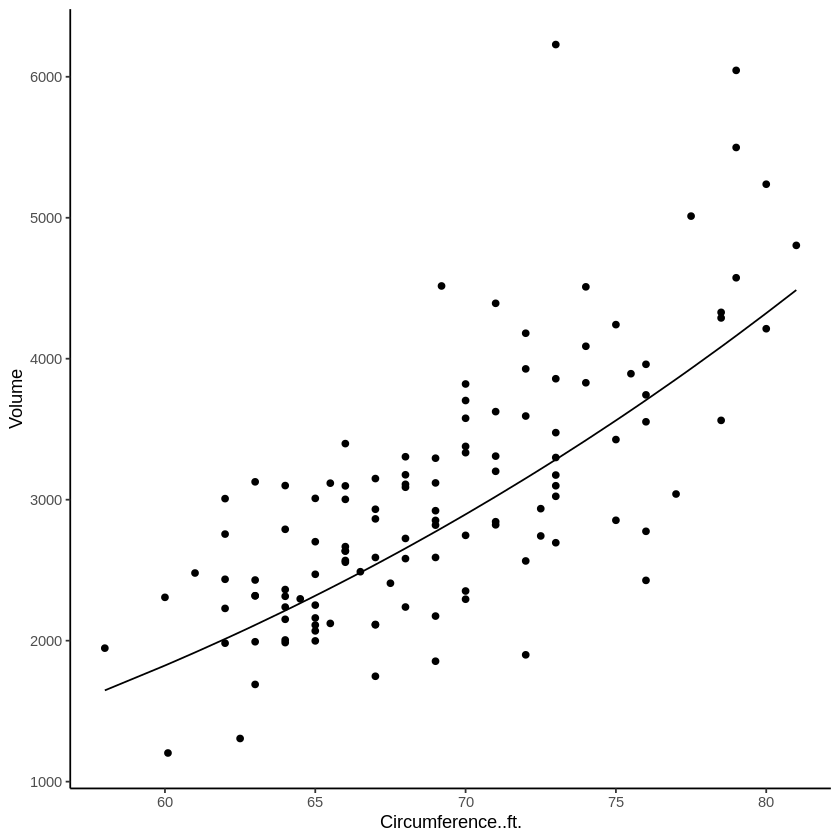

In [ ]:
ggplot(data=Haystacks_with_Residuals, aes(x=Circumference..ft.,y=Volume)) + 
  geom_point() + 
  geom_line(aes(x=Circumference..ft., y=VolumeCircumference)) +
  #geom_smooth(method='lm', formula = y ~ x, se=FALSE)
  #geom_jitter(width=5) +  #Add a little jitter to the points
  theme_classic()

In [ ]:
Haystacks_with_Residuals2 <- (Haystacks
                    %>% mutate(VolumeOver = (Over..ft. * 2)^3/(12*pi^2))
                    %>% mutate(Residual = Volume - VolumeOver)
                    %>% mutate(ResidualSquared = Residual^2)
                )

head(Haystacks_with_Residuals2)



,RowID,Volume,Circumference..ft.,Over..ft.,VolumeOver,Residual,ResidualSquared
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2853,69.0,37.0,3421.481,-568.48128,323170.962
2,2,2702,65.0,36.5,3284.639,-582.63857,339467.709
3,3,3099,73.0,38.5,3854.705,-755.70533,571090.542
4,4,1306,62.5,26.5,1257.033,48.96718,2397.785
5,5,2294,70.0,35.0,2896.097,-602.09717,362520.997
6,6,2725,68.0,36.5,3284.639,-559.63857,313195.334


In [ ]:
(Haystacks_with_Residuals2 
  %>% summarise(sum(ResidualSquared))
)

sum(ResidualSquared)
<dbl>
19955213


In [ ]:
girls <- read.csv("BGSGirls.csv")
head(girls)

,TableID,SomatoType,Weight2,Height2,Weight9,Height9,Leg9,Strength9,Weight18,Height18,Leg18,Strength18
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,1,5.0,13.6,87.7,32.5,133.4,28.4,74,56.9,158.9,34.6,143
2,2,4.0,11.3,90.0,27.8,134.8,26.9,65,49.9,166.0,33.8,117
3,3,5.5,17.0,89.6,44.4,141.5,31.9,104,55.3,162.2,35.1,143
4,4,5.5,13.2,90.3,40.5,137.1,31.8,79,65.9,167.8,39.3,148
5,5,4.5,13.3,89.4,29.9,136.1,27.7,83,62.3,170.9,36.3,152
6,6,3.0,11.3,85.5,22.8,130.6,23.4,60,47.4,164.9,31.8,126


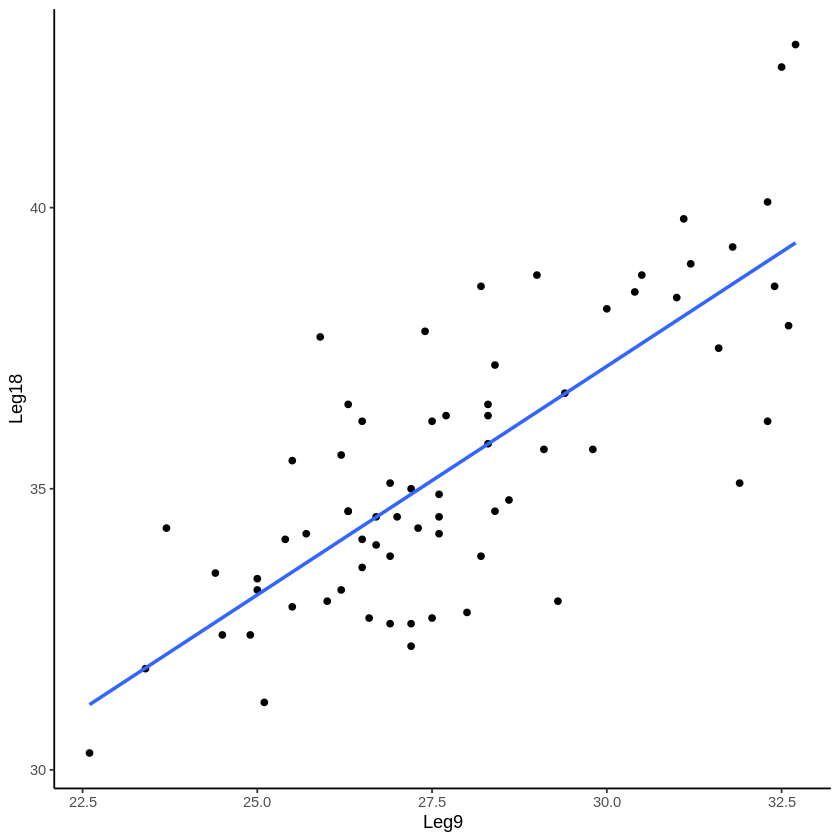

In [ ]:
ggplot(data=girls, aes(x=Leg9,y=Leg18)) + 
  geom_point() + 
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +
  #geom_jitter(width=5) +  #Add a little jitter to the points
  theme_classic()

In [ ]:
girl_model <- lm(Leg18 ~ Leg9, data=girls)

girl_model



Call:
lm(formula = Leg18 ~ Leg9, data = girls)

Coefficients:
(Intercept)         Leg9  
    12.7828       0.8132  


In [ ]:
anova(girl_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Leg9,1,273.9430,273.942952,99.8383,5.64627e-15
Residuals,68,186.5829,2.743866,NA,NA


In [ ]:
summary(girl_model)


Call:
lm(formula = Leg18 ~ Leg9, data = girls)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6236 -0.9164  0.0044  0.9951  3.8555 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.78279    2.27405   5.621 3.85e-07 ***
Leg9         0.81319    0.08139   9.992 5.65e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.656 on 68 degrees of freedom
Multiple R-squared:  0.5948,	Adjusted R-squared:  0.5889 
F-statistic: 99.84 on 1 and 68 DF,  p-value: 5.646e-15
